### Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [1]:
#importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#importing the data table
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\scaler assignment\aerofit_treadmill.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
# data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
# shape of the dataframe
df.shape

(180, 9)

In [5]:
# checking for null values in each column
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

###  Non-Graphical Analysis: 

In [6]:
# number of unique product available.
df.Product.nunique()

3

In [7]:
# different products
df['Product'].unique() 

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [8]:
df['Gender'].unique() # discrete variable

array(['Male', 'Female'], dtype=object)

In [9]:
df['MaritalStatus'].unique() # discrete variable

array(['Single', 'Partnered'], dtype=object)

In [10]:
df['Age'].unique() # continous variable

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [11]:
df['Income'].unique() #continous variable

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [12]:
df['Usage'].unique() # discrete variable

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [13]:
df['Fitness'].unique() # discrete variable

array([4, 3, 2, 1, 5], dtype=int64)

In [14]:
#no of years of education
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [15]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)


<div style="color: blue;">

comments:

The products available for puchase are three and are 'KP281','KP481', 'KP781'.
    
There is no missing values available.
    
Gender,Marital Status,Fitness ,Usage are categorical variables whereas age,income,miles are continous variable.
    
Usage are rated as 2,3,4,5,6,7 and fitness as 1,2,3,4,5.Martal status is categorised as single and partnered and gender as Male and Female.
    
Age of customers ranges from 18 to 50 and miles of distance covered in treadmill varies from 21 to 360

</div>

###  Outlier detection

<Axes: xlabel='Education', ylabel='Density'>

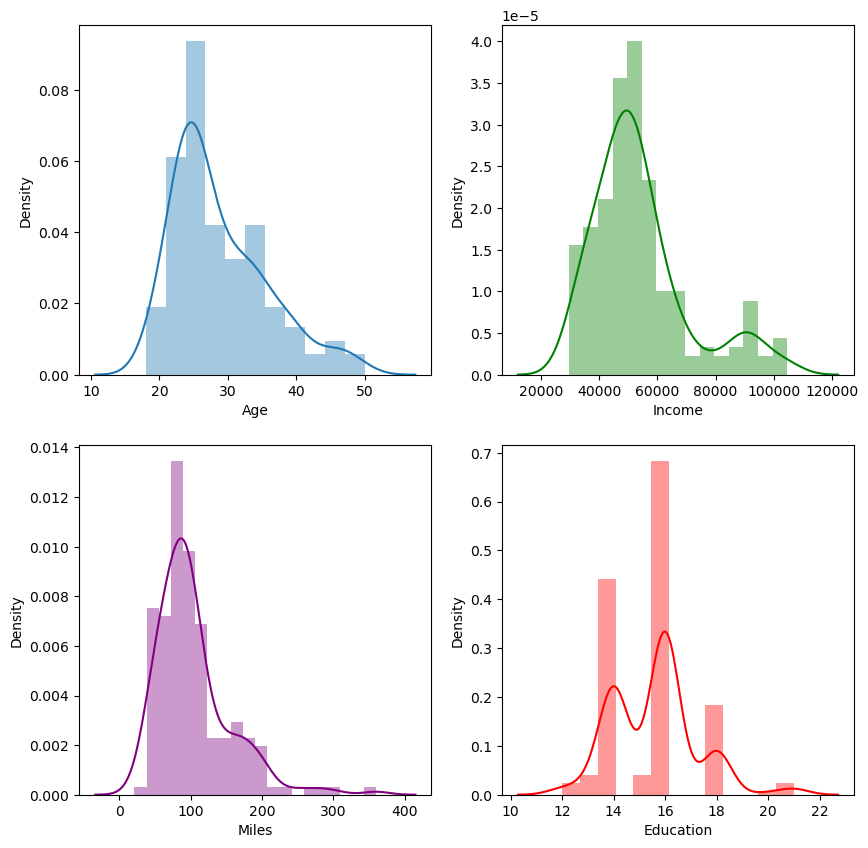

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sn.distplot(df['Age']) # continous variable
plt.subplot(2,2,2)
sn.distplot(df['Income'],color='green') # continous variable
plt.subplot(2,2,3)
sn.distplot(df['Miles'],color='purple')  # continous variable
plt.subplot(2,2,4)
sn.distplot(df['Education'],color='red')  # continous variable

<Axes: xlabel='Age'>

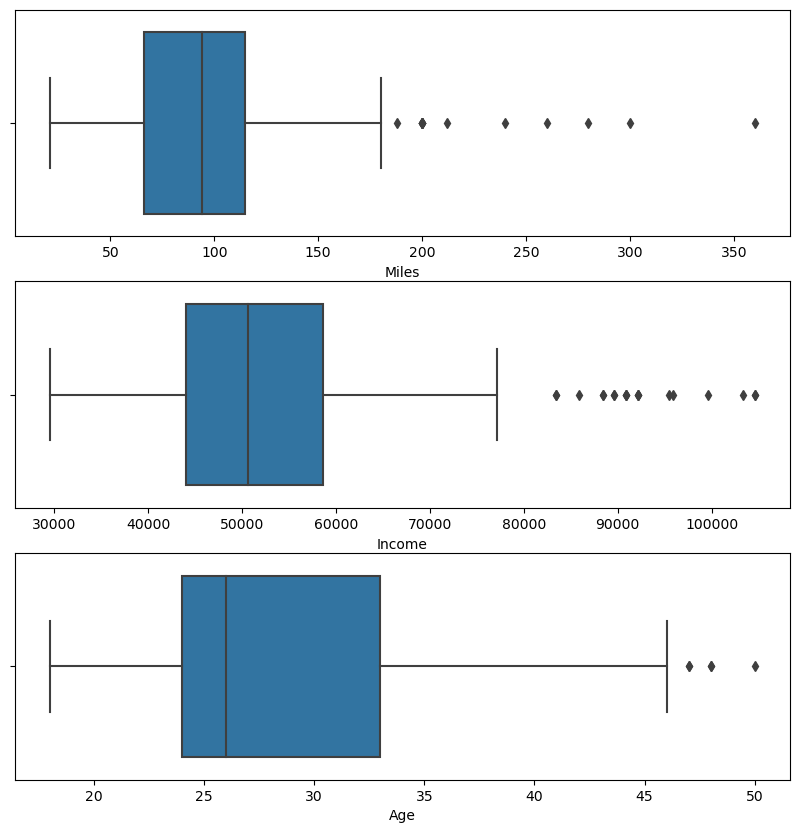

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sn.boxplot(x=df['Miles'])
plt.subplot(3,1,2)
sn.boxplot(x=df['Income'])
plt.subplot(3,1,3)
sn.boxplot(x=df['Age'])

<div style="color: blue;">


Comments:

No above cases shows a normal distribution.

In case of miles distribution and other distributions the outliers can be identified

</div>

### Outlier removal

In [18]:
# defining function to remove outliers:here np.clip will replace the outliers with limiting values

def clip_data_between_percentiles(data, lower_percentile, upper_percentile):
    # Calculate the lower and upper percentile values
    lower_limit = np.percentile(data, lower_percentile)
    upper_limit = np.percentile(data, upper_percentile)

    # Clip the data between the lower and upper percentile values
    clipped_df = np.clip(data, lower_limit, upper_limit)

    return pd.DataFrame(clipped_df)

In [19]:
# Applying the defined fuction to those continous variables

df['Miles']=clip_data_between_percentiles(df['Miles'], lower_percentile=5, upper_percentile=95)
df['Income']=clip_data_between_percentiles(df['Income'], lower_percentile=5, upper_percentile=95)
df['Age']=clip_data_between_percentiles(df['Age'], lower_percentile=5, upper_percentile=95)

<Axes: xlabel='Miles', ylabel='Density'>

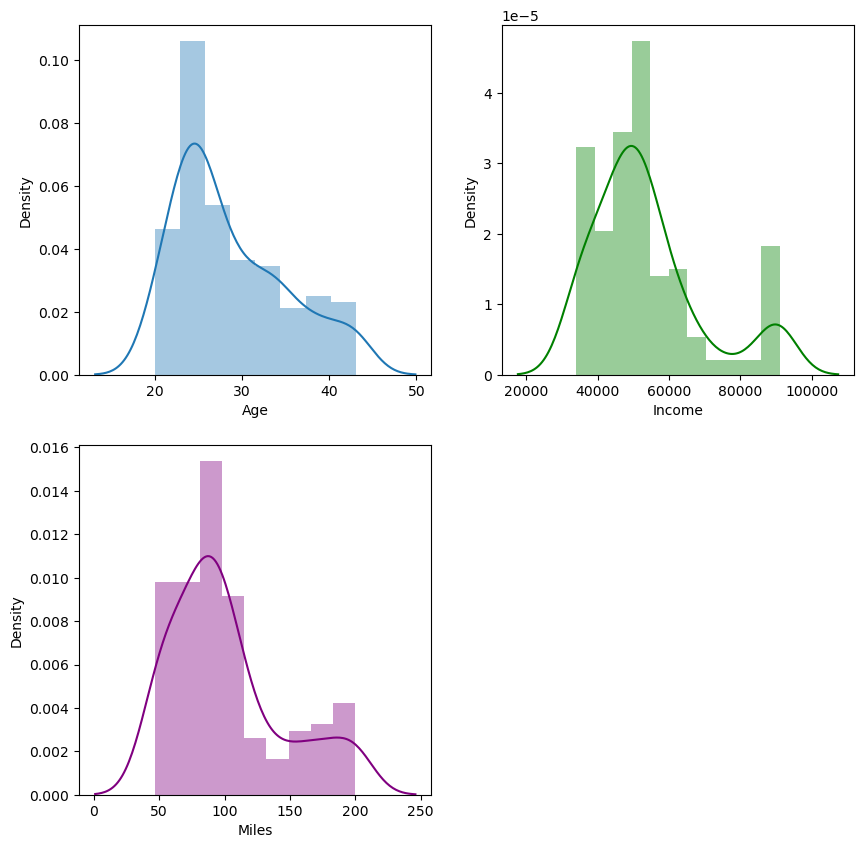

In [20]:
# distribution plot of the outlier removed function

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sn.distplot(df['Age']) # continous variable
plt.subplot(2,2,2)
sn.distplot(df['Income'],color='green') # continous variable
plt.subplot(2,2,3)
sn.distplot(df['Miles'],color='purple')  # continous variable


<Axes: xlabel='Age'>

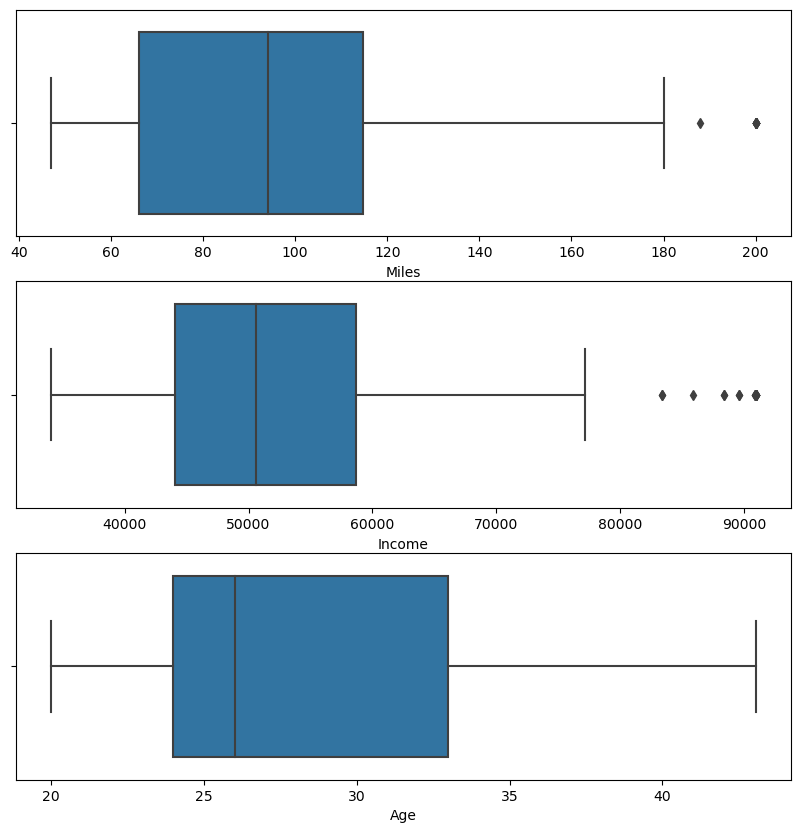

In [21]:

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sn.boxplot(x=df['Miles'])
plt.subplot(3,1,2)
sn.boxplot(x=df['Income'])
plt.subplot(3,1,3)
sn.boxplot(x=df['Age'])

### Visual Analysis 

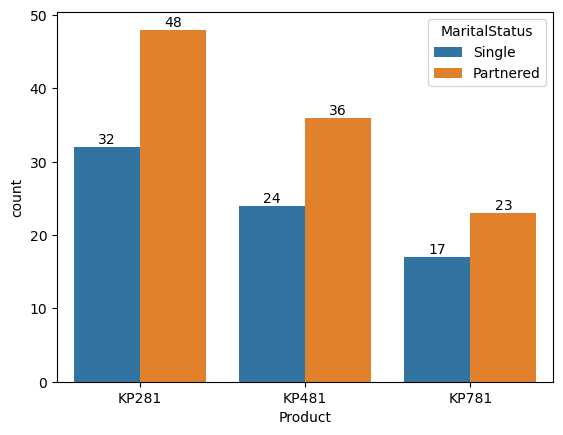

In [22]:
ax=sn.countplot(x=df['Product'],hue=df['MaritalStatus'])
for i in ax.containers:
  ax.bar_label(i,)

<div style="color: blue;">


comments:

Count of customers buying product is lowest in case of KP781 and highest in KP281

People in partnered status is more in customers using product than single,though their proportion is rather constant with respect to each product

</div>

<Axes: xlabel='Product', ylabel='count'>

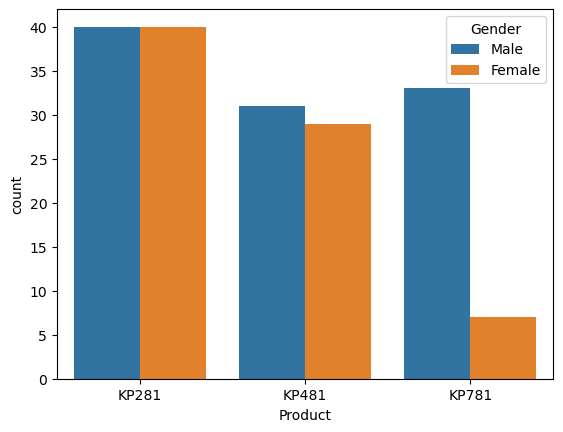

In [23]:
sn.countplot(x=df['Product'],hue=df['Gender'])

<div style="color: blue;">


comments:

Gender based favouring of product is more in product KP781.whereas the for product KP281 is gender is distributed equally. 

Gender favouring is more prominent for costlier treadmill 

</div>

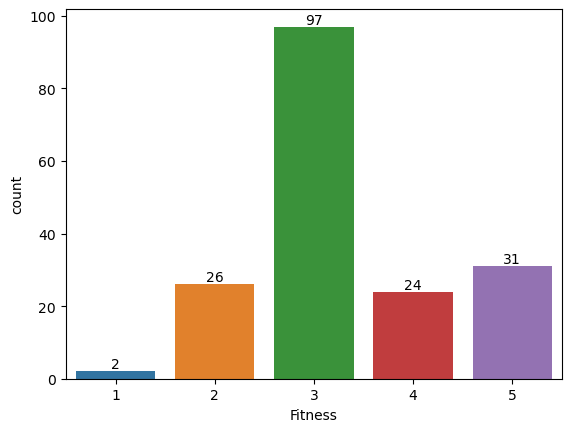

In [24]:
ax=sn.countplot(x=df['Fitness'])
for i in ax.containers:
  ax.bar_label(i,)

<div style="color: blue;">


comments:

More than half of customers are maintaining fitness level 3.
    
people who are using treadmill have the least possibility of having fitness 1    
</div>

<Axes: xlabel='Product', ylabel='Miles'>

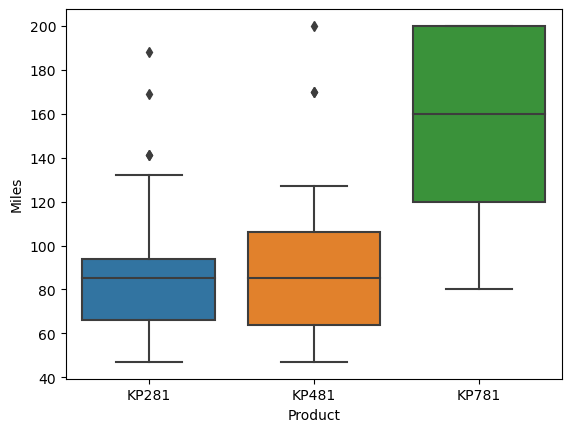

In [25]:
sn.boxplot(x='Product',y='Miles',data=df)

<div style="color: blue;">


comments:

Walking distance of customers using treadmill KP781 is of much higher range than KP281 and KP481.
    
Median distance of customers using KP281 and KP481 are nearly same
    
</div>

<Axes: xlabel='Product', ylabel='Age'>

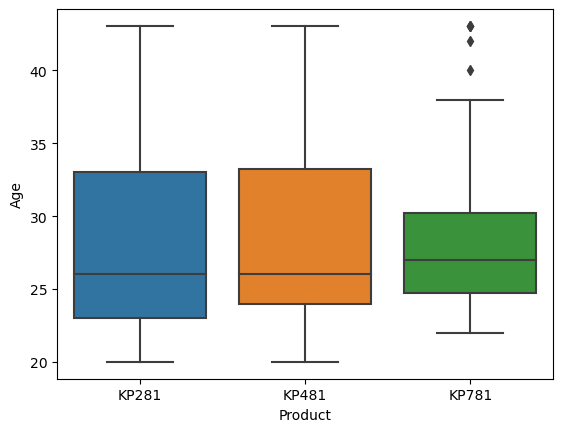

In [26]:
sn.boxplot(x='Product',y='Age',data=df)

<div style="color: blue;">


comments:

Median age of all three treadmill users are nearly same though the distribution of age is narrow in case of KP781 and widest in case of KP281
</div>

<Axes: xlabel='Age', ylabel='Product'>

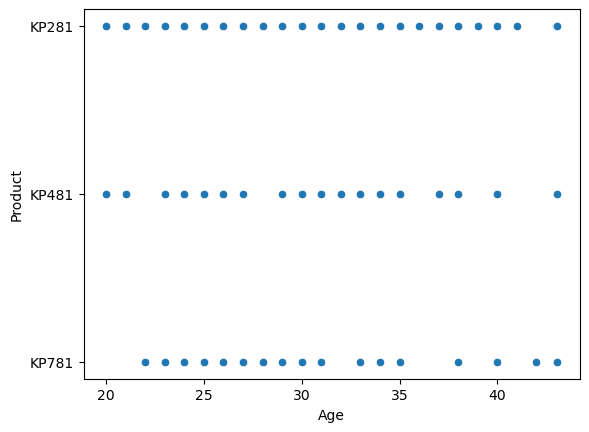

In [27]:
sn.scatterplot(y=df['Product'],x=df['Age'])

<Axes: xlabel='Usage', ylabel='Fitness'>

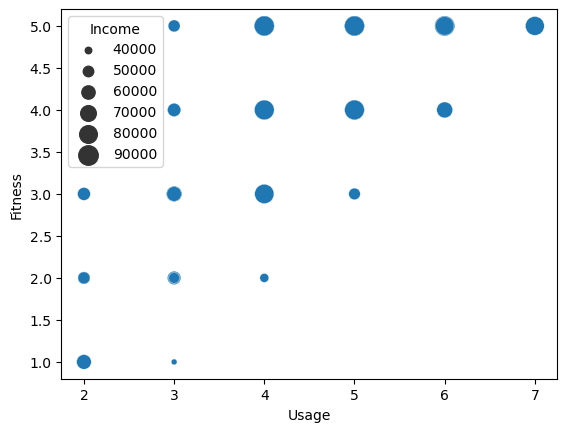

In [28]:
sn.scatterplot(x='Usage',y='Fitness',data=df,size=df['Income'],sizes=(1,200))

<div style="color: blue;">


comments:

Usage and fitness have a positive correlation.That is as usage increasesfitness also increased
    
People earning high salary are highly fitness focused and are active users.
     
</div>

In [29]:
# marginal_probability of each product
cross_tab = pd.crosstab(index=df['Product'], columns='count')
cross_tab

col_0,count
Product,
KP281,80
KP481,60
KP781,40


In [30]:
marginal_prob = round(cross_tab / cross_tab.sum()*100,2)
marginal_prob

col_0,count
Product,
KP281,44.44
KP481,33.33
KP781,22.22


([<matplotlib.patches.Wedge at 0x210caf3ae90>,
 [Text(0.1910130855889934, 1.083288512416601, 'KP281'),
  Text(-0.8426489830535691, -0.7070662566964896, 'KP481'),
  Text(0.8426487844525735, -0.7070664933799371, 'KP781')],
 [Text(0.10418895577581458, 0.5908846431363277, '44.4%'),
  Text(-0.45962671802921945, -0.3856725036526306, '33.3%'),
  Text(0.4596266097014037, -0.3856726327526929, '22.2%')])

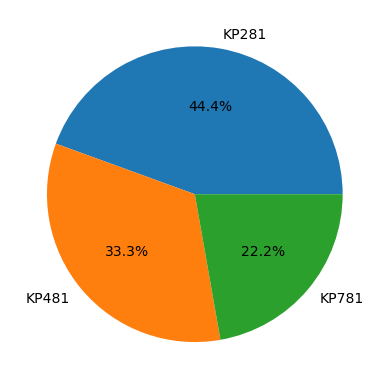

In [31]:
plt.pie(marginal_prob['count'],labels=['KP281','KP481','KP781'],autopct = '%2.1f%%')

<div style="color: blue;">
    
comments:
     
Out of the total customers 80 are using the cheap version and this form almost 45% of the customers rest of products are bought by 22% and 33% respectively.

</div>

### conditional probability

In [32]:
#conditional probability
def category_wise_prob(index_col,category_col):
    cross_tab_2 = pd.crosstab(index=index_col, columns=category_col)
    return cross_tab_2/(cross_tab_2.sum(axis=0))

In [33]:
d_fit=category_wise_prob(df['Product'],df['Fitness'])
d_fit

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.5,0.538462,0.556701,0.375000,0.064516
KP481,0.5,0.461538,0.402062,0.333333,0.000000
KP781,0.0,0.000000,0.041237,0.291667,0.935484


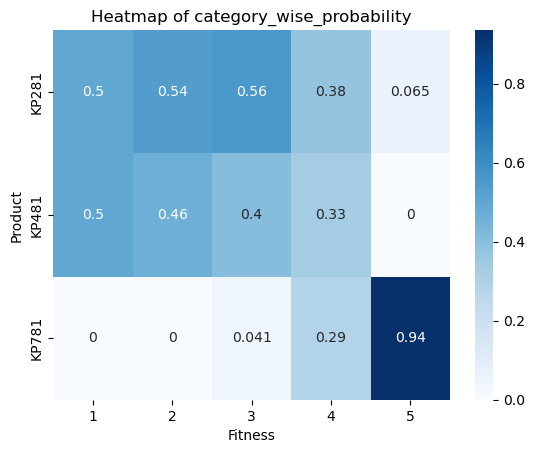

In [34]:
sn.heatmap(d_fit, annot=True,cmap='Blues')

plt.title('Heatmap of category_wise_probability')
plt.xlabel('Fitness')
plt.ylabel('Product')
plt.show()

<div style="color: blue;">
    
comments:
     
For users with fitness 1,2,3,4 probability to choose treadmill KP781 is almost zero.whereas the user with fitness 5 status have 94% probability to choose KP781.

</div>

In [35]:
category_wise_prob(df['Product'],df['Usage'])

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.575758,0.536232,0.423077,0.117647,0.0,0.0
KP481,0.424242,0.449275,0.230769,0.176471,0.0,0.0
KP781,0.000000,0.014493,0.346154,0.705882,1.0,1.0


<Axes: xlabel='Usage'>

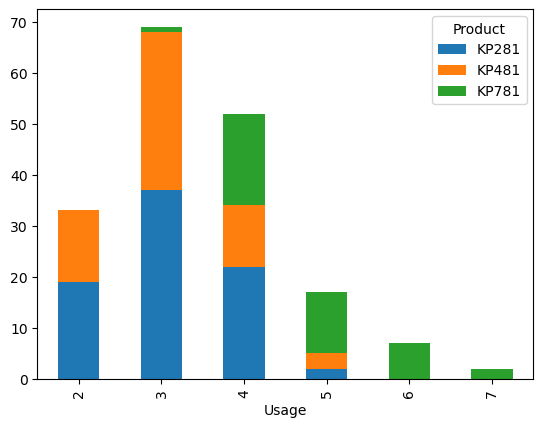

In [36]:
dfo=pd.crosstab(df['Usage'], df['Product'])
dfo.plot(kind='bar', stacked=True)

<div style="color: blue;">
    
comments:
     
Based on the usage,customers with lower usage mostly favoured KP281 and KP481. But as usage status increase above 4 the users go for KP781 predominantly and users in 6 and 7 are only favouring KP781.

</div>

In [37]:
df_gender=category_wise_prob(df['Product'],df['Gender'])
df_gender

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


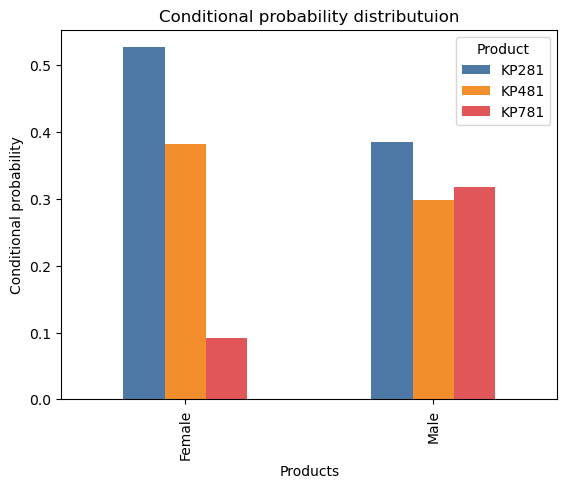

In [38]:
colors = ["#4E79A7", "#F28E2B", "#E15759"]

# Plot DataFrame using Matplotlib
df_gender.T.plot(kind='bar', color=colors)
plt.title('Conditional probability distributuion')
plt.xlabel('Products')
plt.ylabel('Conditional probability')
plt.show()

<div style="color: blue;">
    
comments:
     
There is differents in favouritism in case of male and female customers.

Females largely opted for cheap treadmills and least opted for coastlier once.

Whereas in male customers there is no such observable favouritism ,every products are rather equally opted. 

</div>

In [39]:
df_marital=category_wise_prob(df['Product'],df['MaritalStatus'])
df_marital

MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877


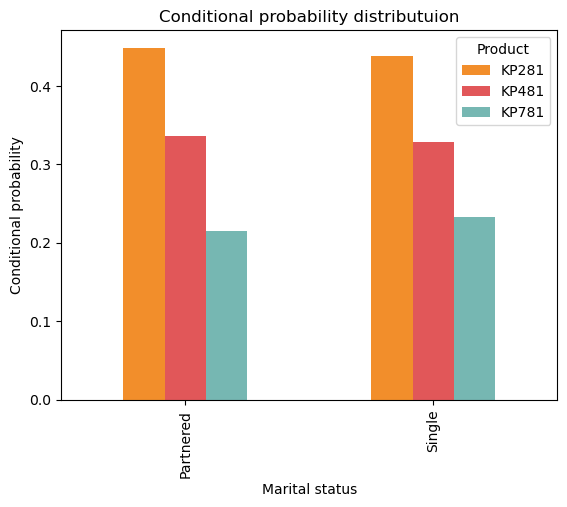

In [40]:
colors = ["#F28E2B", "#E15759", "#76B7B2"]

# Plot DataFrame using Matplotlib
df_marital.T.plot(kind='bar', color=colors)
plt.title('Conditional probability distributuion')
plt.xlabel('Marital status')
plt.ylabel('Conditional probability')
plt.show()

<div style="color: blue;">
    
comments:
     
There is least correlation between marital status and product choosen.Both single and partnered customers show similar parchasing behaviour.

</div>

In [41]:
df_edu=category_wise_prob(df['Product'],df['Education'])
df_edu

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,0.666667,0.6,0.545455,0.8,0.458824,0.086957,0.0,0.0
KP481,0.333333,0.4,0.418182,0.2,0.364706,0.086957,0.0,0.0
KP781,0.000000,0.0,0.036364,0.0,0.176471,0.826087,1.0,1.0


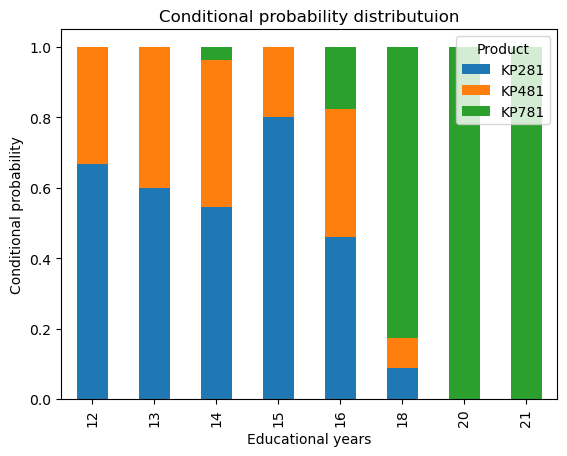

In [42]:
df_edu.T.plot(kind='bar', stacked=True)
plt.title('Conditional probability distributuion')
plt.xlabel('Educational years')
plt.ylabel('Conditional probability')
plt.show()

<div style="color: blue;">
    
comments:
 
There is a similar trend as observed in usage status ,that is for education above 16 years treadmill KP781 is most opted cheap once are favoured for customers with low years spend on educational status.


</div>

In [43]:
df1=df.copy()

In [44]:
# converting categorical variables into numerical domain for analysing correlation relation

df1['Product']=df1['Product'].replace({'KP281':1,'KP481':2,'KP781':3})
df1['Gender']=df1['Gender'].replace({'Male':0,'Female':1})
df1['MaritalStatus']=df1['MaritalStatus'].replace({'Single':0,'Partnered':1})
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,1,20.0,0,14,0,3,4,34053.15,112
1,1,20.0,0,15,0,2,3,34053.15,75
2,1,20.0,1,14,1,4,3,34053.15,66
3,1,20.0,0,12,0,3,3,34053.15,85
4,1,20.0,0,13,1,4,2,35247.00,47


In [45]:
df1.groupby('Product').aggregate(['mean','median'])

Age           Gender         Education        MaritalStatus  \
              mean median      mean median       mean median          mean   
Product                                                                      
1        28.427500   26.0  0.500000    0.5  15.037500   16.0         0.600   
2        28.801667   26.0  0.483333    0.0  15.116667   16.0         0.600   
3        28.828750   27.0  0.175000    0.0  17.325000   18.0         0.575   

                   Usage        Fitness              Income             Miles  \
        median      mean median    mean median         mean   median     mean   
Product                                                                         
1          1.0  3.087500    3.0  2.9625    3.0  46584.31125  46617.0   83.125   
2          1.0  3.066667    3.0  2.9000    3.0  49046.60750  49459.5   88.500   
3          1.0  4.775000    5.0  4.6250    5.0  73908.28125  76568.5  155.900   

                
        median  
Product         
1         85.0  
2         85.0  
3        160.0

In [46]:
df1.describe()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.777778,28.641389,0.422222,15.572222,0.594444,3.455556,3.311111,53477.070000,101.088889
std,0.787866,6.446373,0.495291,1.617055,0.492369,1.084797,0.958869,15463.662523,43.364286
min,1.000000,20.000000,0.000000,12.000000,0.000000,2.000000,1.000000,34053.150000,47.000000
25%,1.000000,24.000000,0.000000,14.000000,0.000000,3.000000,3.000000,44058.750000,66.000000
50%,2.000000,26.000000,0.000000,16.000000,1.000000,3.000000,3.000000,50596.500000,94.000000
75%,2.000000,33.000000,1.000000,16.000000,1.000000,4.000000,4.000000,58668.000000,114.750000
max,3.000000,43.050000,1.000000,21.000000,1.000000,7.000000,5.000000,90948.250000,200.000000


## Check correlation among different factors using heat maps or pair plots.

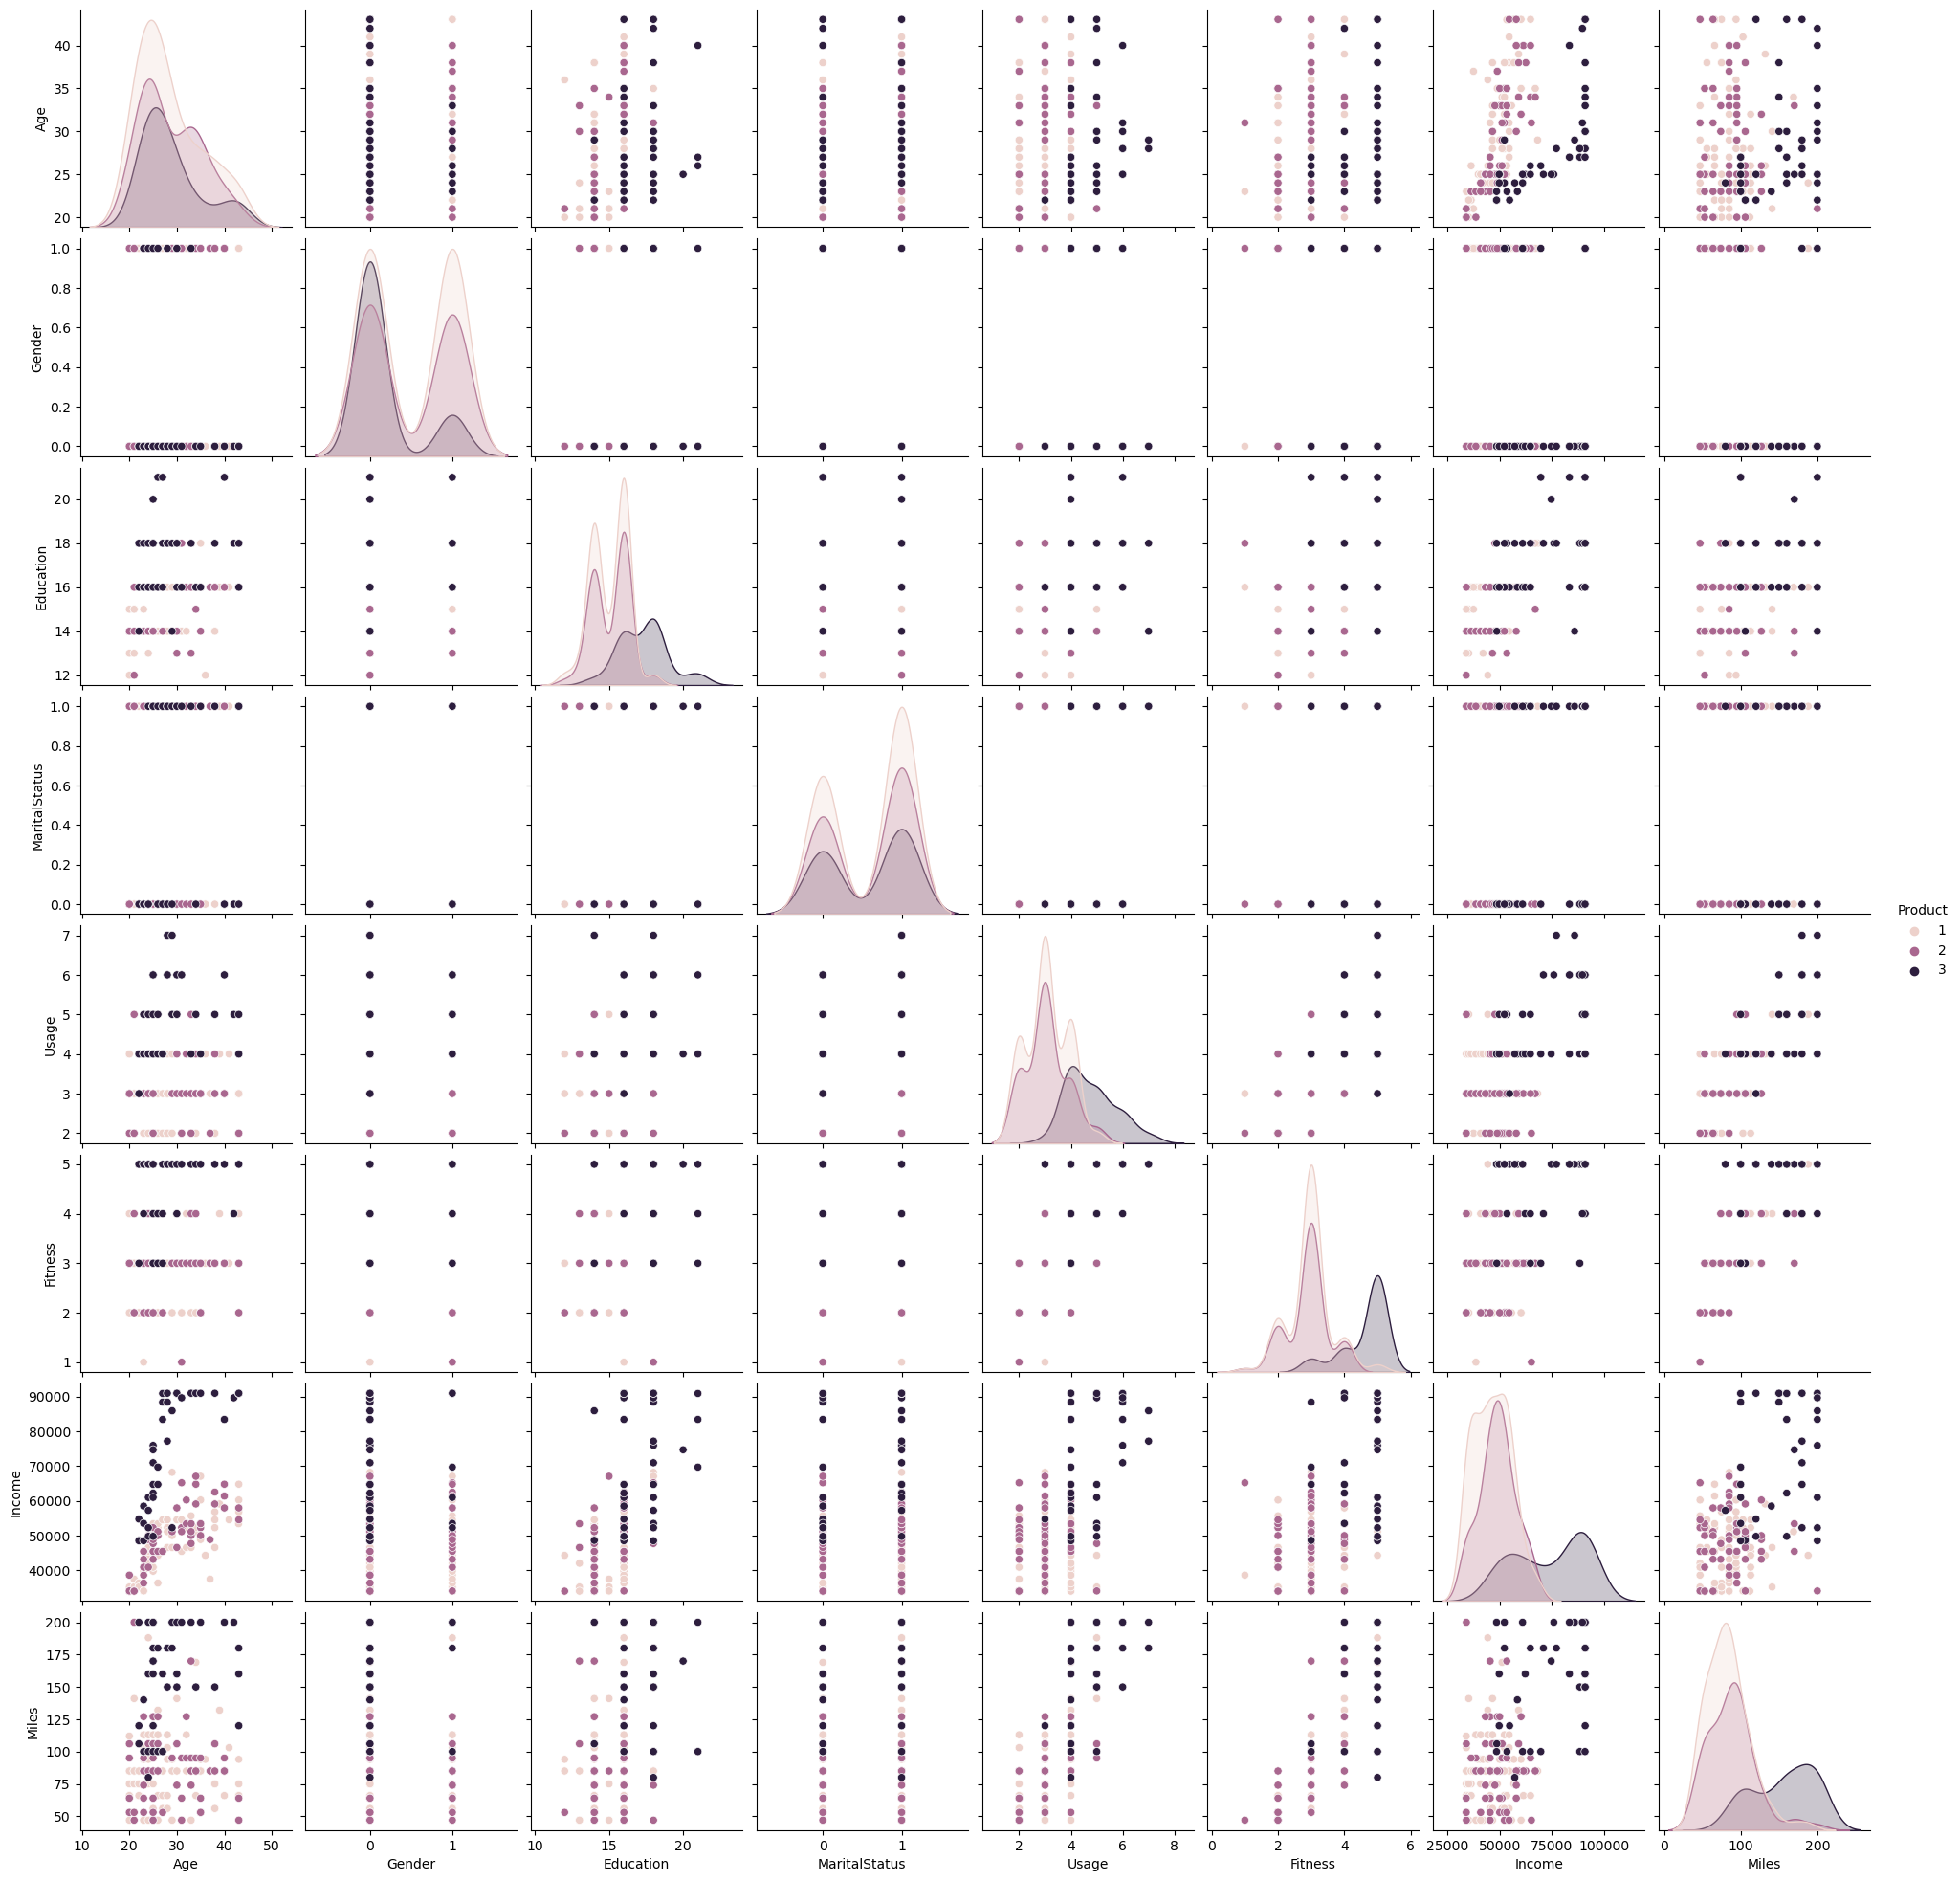

In [47]:
# Check correlation among different factors using pair plots.
sn.pairplot(data=df1,hue='Product')

In [48]:
# Checking the correlation among different factors
df1.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.027065,-0.230653,0.495018,-0.017602,0.537447,0.594883,0.627597,0.593494
Age,0.027065,1.000000,-0.027288,0.279533,0.184322,0.018020,0.059047,0.514362,0.029636
Gender,-0.230653,-0.027288,1.000000,-0.094089,0.018836,-0.214424,-0.254609,-0.203453,-0.227791
Education,0.495018,0.279533,-0.094089,1.000000,0.068569,0.395155,0.410581,0.628908,0.367262
MaritalStatus,-0.017602,0.184322,0.018836,0.068569,1.000000,-0.007786,-0.050751,0.139382,-0.020019
Usage,0.537447,0.018020,-0.214424,0.395155,-0.007786,1.000000,0.668606,0.527707,0.786269
Fitness,0.594883,0.059047,-0.254609,0.410581,-0.050751,0.668606,1.000000,0.535945,0.822393
Income,0.627597,0.514362,-0.203453,0.628908,0.139382,0.527707,0.535945,1.000000,0.537297
Miles,0.593494,0.029636,-0.227791,0.367262,-0.020019,0.786269,0.822393,0.537297,1.000000


<Axes: >

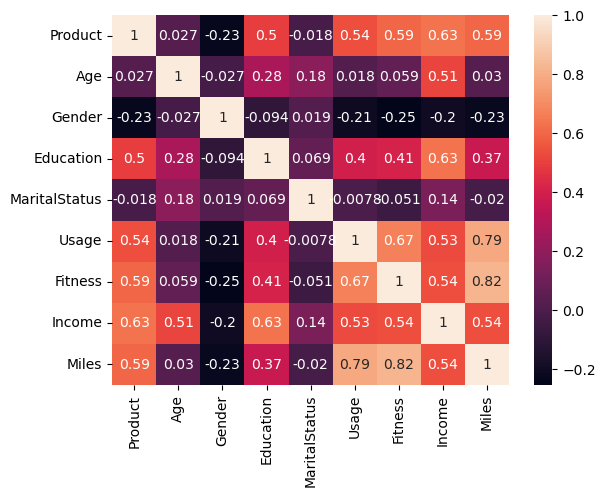

In [49]:
# Check correlation among different factors using heatmap.
sn.heatmap(df1.corr(),annot=True)

<div style="color: blue;">
    
Comments:
 
Education,Usage,Fitness ,Income and Miles are highly correlated with the product that is purchased.
    
Out of the independent variables income is highly correlated with age,education,usage,fitness and miles.
    
Age and Marital status have no vital roles deciding the product.
    
Fitness and miles are correlated by 82%
    
Usage and marital status are least correlated.

</div>